# Data Uploading & Preprocessing / Encoding.

In [13]:
import pandas as pd
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Encoding
from sklearn.preprocessing import OrdinalEncoder

# Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

# Uploading dataset
df = pd.read_csv('/content/drive/MyDrive/Pod 4/Work and Self-Rated Mental Health Data.csv')

# Since there is no null values and no columns we want to drop we set df equal to #df_clean
df_clean = df

# Splitting columns into ones to one-hot encode versus label encode
# (nominal -> there's no ranking or natural order VS ordinal -> there is an order or natural ranking)
nominal_cols = ['gender', 'covid_distancing', 'covid_masks', 'self_rated_mental_health', 'ethnicity', 'occupation', 'work_from_home']
ordinal_cols = ['age', 'vaccinated', 'income', 'educational_attainment']

# One Hot Encoding Nominal:

# Encoding nominal_cols using One-Hot-Encoding
df_encoded = pd.get_dummies(df_clean, columns = nominal_cols) #drop_first=True

# Label Encoding Ordinal:

# Custom orders for each column
custom_orders = [
    ['18 to 29 years-old', '30 to 39 years-old', '40 to 49 years-old', '50 to 59 years-old', '60 years and older'],  # Order for "age"
    ['No', 'Yes, one dose', 'Yes, two doses'],   # Order for "vaccinated"
    ['Less than $30,000', '$30,000 to $59,999', '$60,000 to $89,999', '$90,000 or more'],    # Order for "income"
    ['High School Diploma or Lower', 'Some College', "Bachelor's Degree or Higher"],    # Order for "educational_attainment"
]

# Apply OrdinalEncoder with custom orders
encoder = OrdinalEncoder(categories=custom_orders)
encoded_ordinal_cols = encoder.fit_transform(df_encoded[ordinal_cols])

# Add the encoded columns to the DataFrame
df_encoded[ordinal_cols] = encoded_ordinal_cols

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 35 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   age                                                                       1576 non-null   float64
 1   vaccinated                                                                1576 non-null   float64
 2   hours                                                                     1576 non-null   float64
 3   income                                                                    1576 non-null   float64
 4   educational_attainment                                                    1576 non-null   float64
 5   gender_Man                                                                1576 non-null   bool   
 6   gender_Non-binary                                               

#Visualizations.

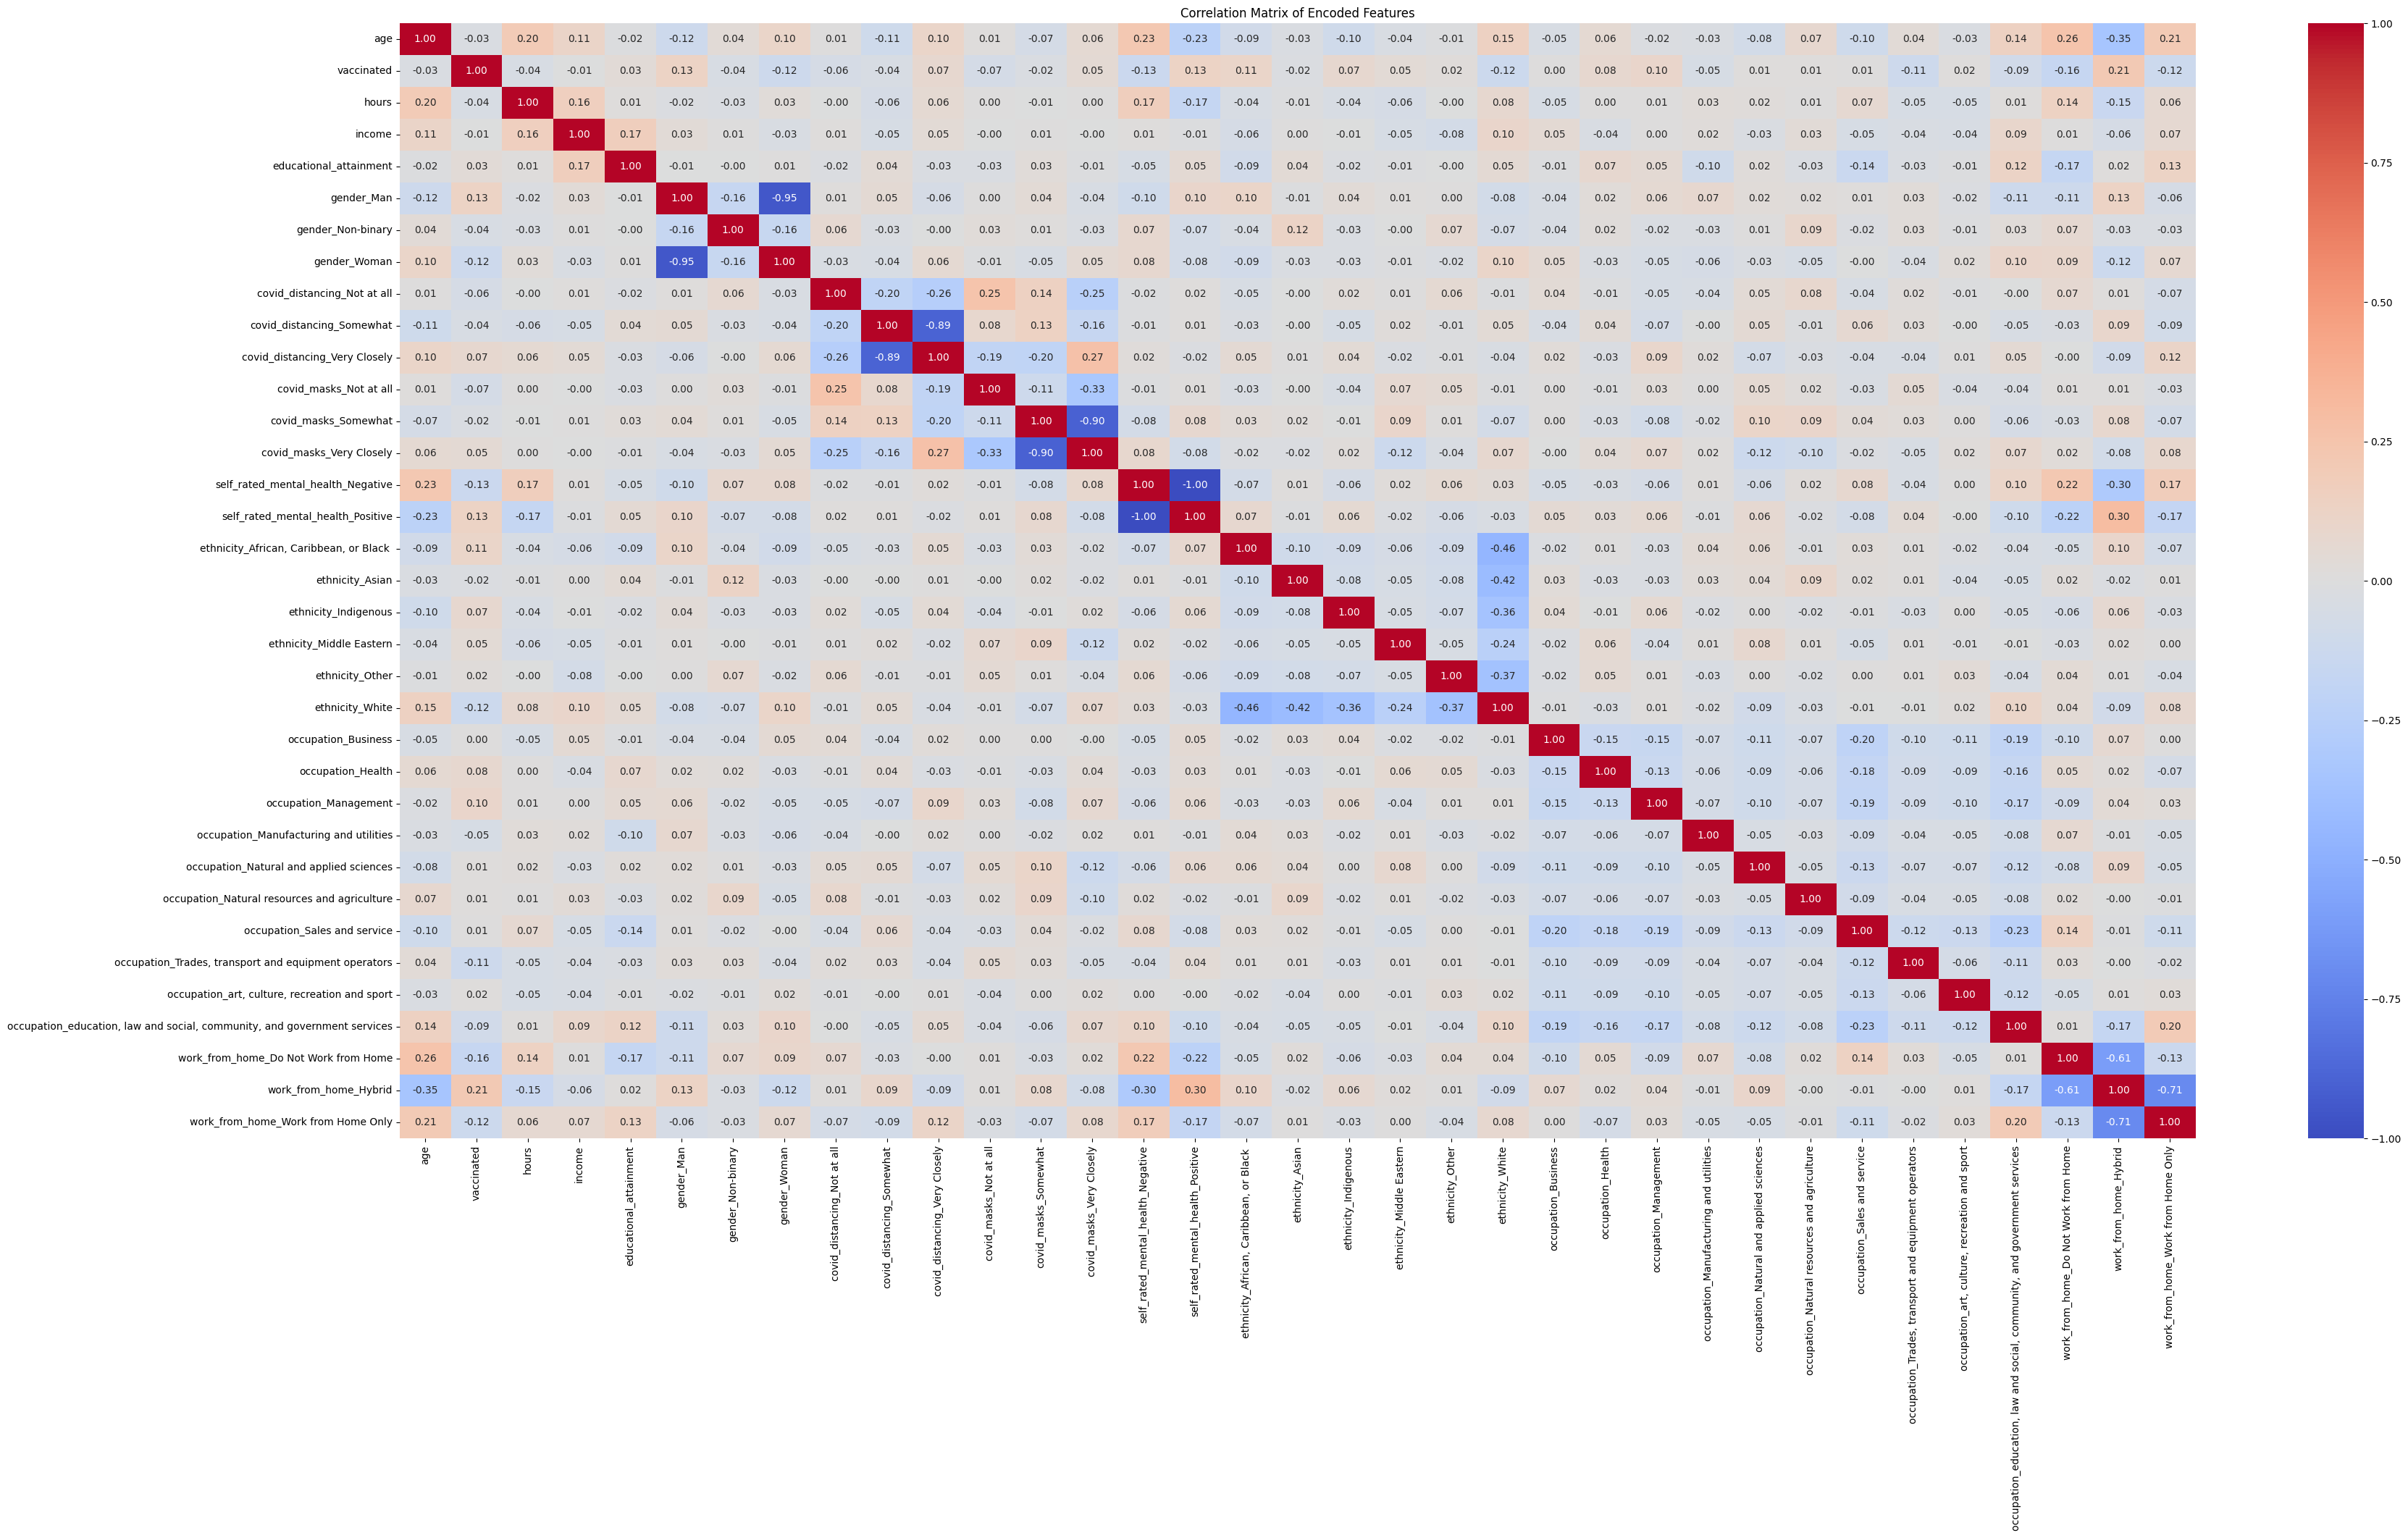

In [15]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Encoded Features')
plt.show()

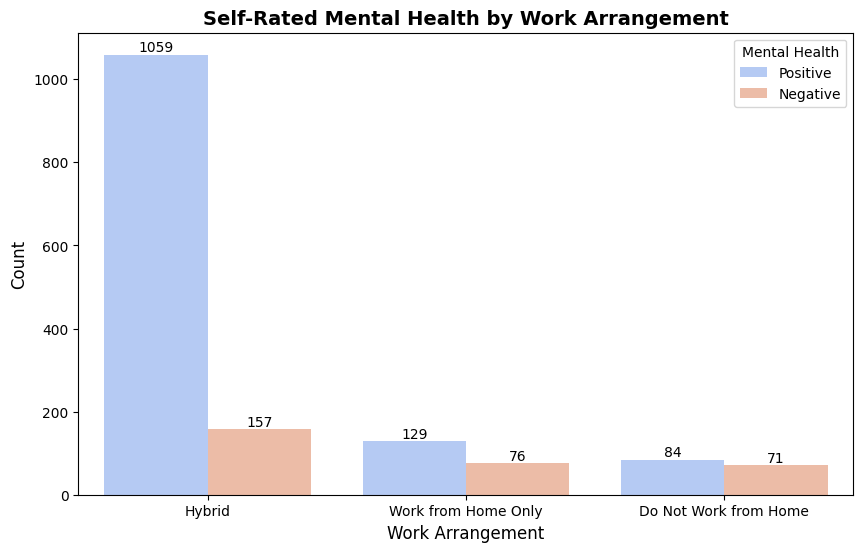

In [16]:
# Bar Chart: Self-Rated Mental Health by Work Arrangement

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="work_from_home", hue="self_rated_mental_health", palette="coolwarm")

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with positive height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.xlabel("Work Arrangement", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Self-Rated Mental Health by Work Arrangement", fontsize=14, fontweight='bold')
plt.legend(title="Mental Health")
plt.show()

<ipython-input-17-e1ccab2c9db8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="work_from_home", y="hours", palette=custom_palette)


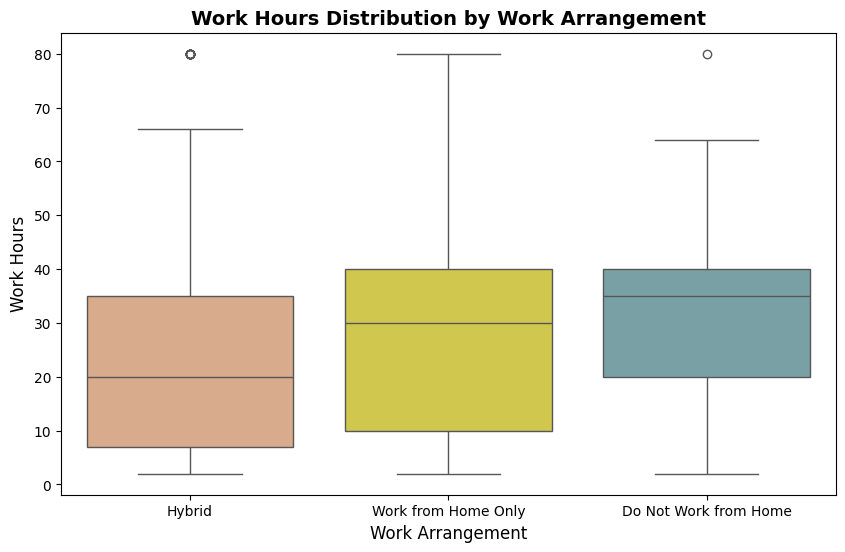

In [17]:
# Boxplot: Work Hours Distribution by Work Arrangement

plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette(["#E5A87F", "#E6D939", "#72A7AC"])
sns.boxplot(data=df, x="work_from_home", y="hours", palette=custom_palette)
plt.xlabel("Work Arrangement", fontsize=12)
plt.ylabel("Work Hours", fontsize=12)
plt.title("Work Hours Distribution by Work Arrangement", fontsize=14, fontweight='bold')
plt.show()